In [2]:
import numpy as np

'''
generate sequences on the basis of given probabilties
'''

n=150000

initial_p={"A":0.5,"B":0.5}

transition_p_froma={"A":0.99999,"B":0.00001}
transition_p_fromb={"A":0.00001,"B":0.99999}

emission_p_froma={".":0.967,"a":0.03,"b":0.003}
emission_p_fromb={".":0.967,"a":0.003,"b":0.03}

ip_np=np.array(list(initial_p.values()))
tp_np=np.array([list(transition_p_froma.values()),
                list(transition_p_fromb.values())])
ep_np=np.array([list(emission_p_froma.values()),
                list(emission_p_fromb.values())])


In [3]:
hid_seq=np.random.choice(list(initial_p.keys()), p=list(initial_p.values()))

for i in range(n):
    if hid_seq[-1]=="A":
        step=np.random.choice(list(transition_p_froma.keys()), p=list(transition_p_froma.values()))
        hid_seq+=step
    else:
        step=np.random.choice(list(transition_p_fromb.keys()), p=list(transition_p_fromb.values()))
        hid_seq+=step

print(hid_seq)

#hid_seq="BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA"

BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB

In [4]:
emission_seq=""

for hidden_state in hid_seq:
    if hidden_state=="A":
        emission=np.random.choice(list(emission_p_froma.keys()), p=list(emission_p_froma.values()))
        emission_seq+=emission
    else:
        emission=np.random.choice(list(emission_p_fromb.keys()), p=list(emission_p_fromb.values()))
        emission_seq+=emission

print(emission_seq)
#emission_seq="bb...b......bb.b.b.b...bb.bb....b.baa...a.a..aaabaaaa.aaa....aa.aa....a.aa..a......a.a.aaa.........aa"



b.........................b................b.b.b........................................................................a....................................................................b...........................................b.b....b......................b................................b...................................................................................b................b....................b.b....a......................................................................b...............................................b..................bb.............bb...................b.............................................b...............b........b.....b.b....................................b............................................................................b.......b......................................b.....................................................................b........b..............................b....b.....................b......b................

In [8]:
'''
test viterbi algorithm
'''

def viterbi(y, A, B, pi):
    """
        viterbi algorithm
        :param y: observation sequence
        :param A: the transition matrix
        :param B: the emission matrix
        :param pi: the initial probability distribution
    """
    N = B.shape[0]
    x_seq = np.zeros([N, 0])
    V = np.log(B[:, y[0]]) + np.log(pi)
    
    # forward to compute the optimal value function V
    for y_ in y[1:]:
        _V = np.log(np.tile(B[:, y_], reps=[N, 1]).T) + np.log(A.T) + np.tile(V, reps=[N, 1])
        x_ind = np.argmax(_V, axis=1)
        x_seq = np.hstack([x_seq, np.c_[x_ind]])

        V = _V[np.arange(N), x_ind]

    x_T = np.argmax(V)

    # backward to fetch optimal sequence
    x_seq_opt, i = np.zeros(x_seq.shape[1]+1), x_seq.shape[1]
    prev_ind = x_T
    while i >= 0:
        x_seq_opt[i] = prev_ind
        i -= 1
        prev_ind = x_seq[int(prev_ind), i]
    return x_seq_opt




In [9]:
hidden_index=[]
for h in hid_seq:
    if h=="A":
        hidden_index.append(0)
    else:
        hidden_index.append(1)
emission_index=[]
for e in emission_seq:
    if e==".":
        emission_index.append(0)
    elif e=="a":
        emission_index.append(1)
    else:
        emission_index.append(2)



In [10]:
#print(emission_index)

o=viterbi(emission_index, tp_np, ep_np, ip_np)

predicted_hidden_index = o.tolist()
predicted_hidden_index = [int(x) for x in predicted_hidden_index]

#print(hidden_index)
#print(predicted_hidden_index)

accuracy = sum([1 for i in range(len(hidden_index)) if hidden_index[i] == predicted_hidden_index[i]]) / len(hidden_index)
print(accuracy)

0.9997066686222091


[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

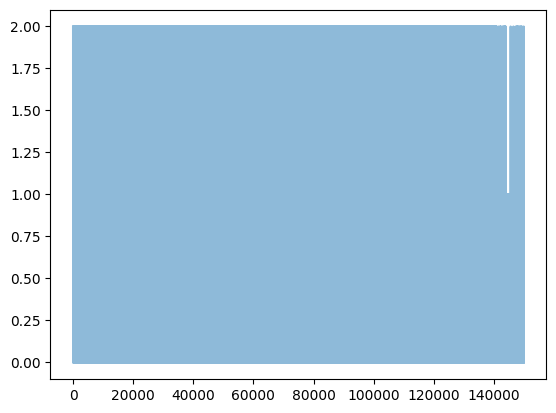

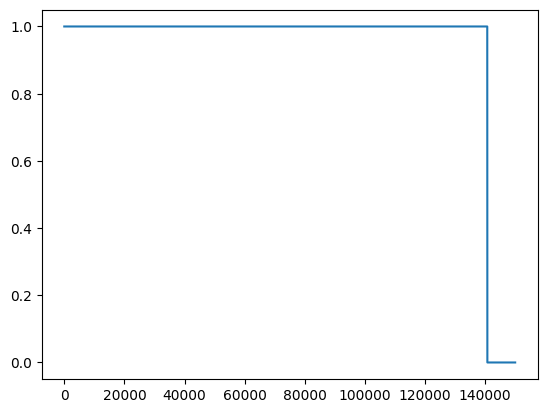

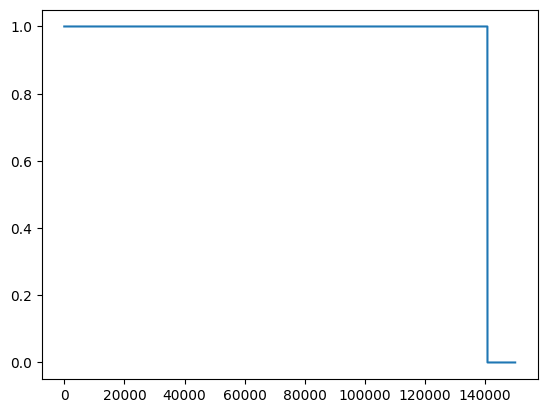

In [16]:
import matplotlib.pyplot as plt

#plt.plot(hidden_index, label="true")
plt.plot(emission_index, "|", label="emission", alpha=0.5)
plt.show()
plt.plot(predicted_hidden_index, label="predicted")
plt.show()
plt.plot(hidden_index, label="true")
plt.show()